In [1]:
import tensorflow as tf
import os
import scipy.io.wavfile
from scipy.io.wavfile import read
import math
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib notebook

In [3]:
amplitudes, sample_rate = librosa.core.load("Z_1_1.wav")
sample_rate

22050

In [4]:
ipd.Audio(amplitudes[:480000], rate = sample_rate)

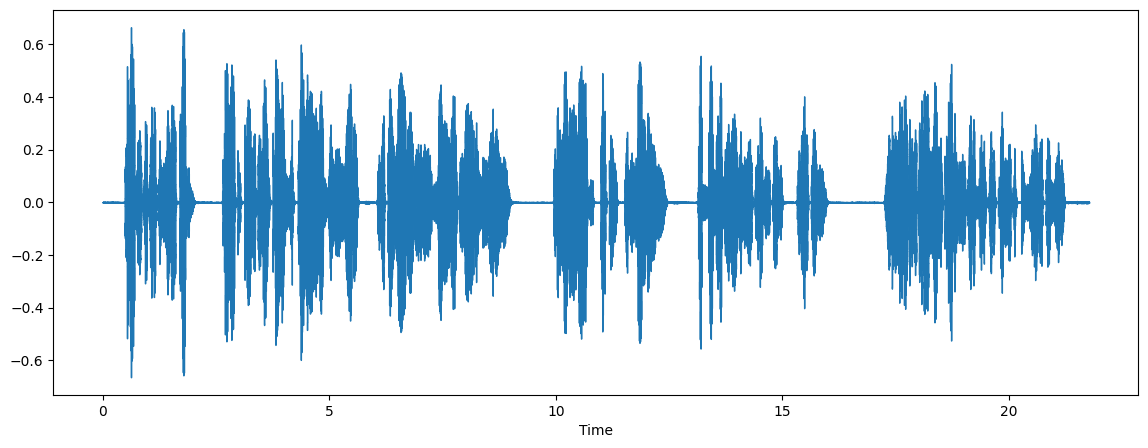

In [7]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(amplitudes[:480000], sr=sample_rate)

In [13]:
FRAME_SIZE=2048
HOP_SIZE=1024
slices=amplitudes[:480000]

In [14]:
def plot_spectrogram(spectrogram):
    fig, ax = plt.subplots(figsize=(10, 2))
    im = ax.imshow(spectrogram, aspect="auto", origin="lower",
                   interpolation='none')
    plt.colorbar(im, ax=ax)

    fig.canvas.draw()
    plt.show()

    return fig

In [15]:
def get_spectrogram(amplitudes, window_length=FRAME_SIZE, hop_length=HOP_SIZE):
    """
    Implement Power Spectrogram as described above.
    :param amplitudes: float [num_amplitudes], time-series of sound amplitude, same as above
    :param window_length: length of a patch to which you apply FFT
    :param hop_length: interval between consecutive windows
    :returns: power-frequency spetrogram [n_freq, duration]
    """
    # Step I: compute Short-Time Fourier Transform
    STFT = librosa.stft(amplitudes, n_fft=window_length, hop_length= hop_length)
    
    
    # Step II: convert stft to a spectrogram
    spectrogram=np.zeros((STFT.shape[0],STFT.shape[1],2))
    spectrogram[:,:,0] = STFT.imag
    spectrogram[:,:,1] = STFT.real
    #spectrogram = np.abs(STFT)**2
    #angle = np.angle(stft)
    
    return spectrogram

In [27]:
spectrogram=get_spectrogram(slices)
#plot_spectrogram(20*np.log(spectrogram+1e-3))
spectrogram.shape

(1025, 469, 2)

In [38]:
spec=tf.signal.stft(
    slices,
    frame_length=FRAME_SIZE,
    frame_step=HOP_SIZE,
)
data=np.zeros((spec.shape[0],spec.shape[1],2));

data[:,:,0] = np.real(spec)
data[:,:,1] = np.imag(spec)
data

array([[[-1.08419649e-01,  0.00000000e+00],
        [ 8.60307068e-02, -1.69850767e-01],
        [-5.72825000e-02,  2.39200890e-01],
        ...,
        [ 1.86264515e-09,  1.49011612e-08],
        [-3.72529030e-09, -7.45058060e-09],
        [ 0.00000000e+00,  0.00000000e+00]],

       [[ 3.57195847e-02,  0.00000000e+00],
        [-1.26474202e-01, -9.01186466e-02],
        [ 1.88743040e-01,  1.42011523e-01],
        ...,
        [-1.49011612e-08,  7.45058060e-09],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 3.72529030e-09,  0.00000000e+00]],

       [[ 5.55953309e-02,  0.00000000e+00],
        [-1.64070368e-01, -2.03588530e-02],
        [ 1.81897521e-01,  4.33475971e-02],
        ...,
        [-7.45058060e-09,  0.00000000e+00],
        [ 7.45058060e-09,  8.38190317e-09],
        [-1.86264515e-09,  0.00000000e+00]],

       ...,

       [[ 1.29919574e-02,  0.00000000e+00],
        [-3.01741273e-03,  1.51672531e-02],
        [-7.22726574e-03, -7.76390135e-02],
        ...,
     

In [39]:
spec

<tf.Tensor: shape=(467, 1025), dtype=complex64, numpy=
array([[-1.0841965e-01+0.0000000e+00j,  8.6030707e-02-1.6985077e-01j,
        -5.7282500e-02+2.3920089e-01j, ...,
         1.8626451e-09+1.4901161e-08j, -3.7252903e-09-7.4505806e-09j,
         0.0000000e+00+0.0000000e+00j],
       [ 3.5719585e-02+0.0000000e+00j, -1.2647420e-01-9.0118647e-02j,
         1.8874304e-01+1.4201152e-01j, ...,
        -1.4901161e-08+7.4505806e-09j,  0.0000000e+00+0.0000000e+00j,
         3.7252903e-09+0.0000000e+00j],
       [ 5.5595331e-02+0.0000000e+00j, -1.6407037e-01-2.0358853e-02j,
         1.8189752e-01+4.3347597e-02j, ...,
        -7.4505806e-09+0.0000000e+00j,  7.4505806e-09+8.3819032e-09j,
        -1.8626451e-09+0.0000000e+00j],
       ...,
       [ 1.2991957e-02+0.0000000e+00j, -3.0174127e-03+1.5167253e-02j,
        -7.2272657e-03-7.7639014e-02j, ...,
         1.0011718e-08+0.0000000e+00j, -3.6088750e-09+6.9849193e-09j,
        -1.1175871e-08+0.0000000e+00j],
       [ 3.9759934e-02+0.0000000e+00j